Input features: (R)Runs, (AB)At Bats, (H)Hits, (2B)Doubles, (3B)Triples, (HR)Homeruns, (BB)Walks, (SO)Strikeouts, (SB)Stolen Bases, (RA)Runs Allowed, (ER)Earned Runs, Earned Run Average (ERA), (CG)Shutouts, (SV)Saves, (CG)Complete Games and (E)Errors

Output: Number of predicted wins (W)

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing Dataset

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [4]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
#Checking null values in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In dataset no missing value present.

In [6]:
#Checking shape of dataset
df.shape

(30, 17)

There are 30 rows and 17 columns in dataset.

In [7]:
#Checking the data types of all columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All columns are integer datatype except ERA its a float datatype.
As per problem statement Target variable i.e. W is integer i.e. continuous value so we Regression to learn our model.

In [8]:
#Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In dataset no null values.

In [9]:
#Checking unique values of each columns
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

There are number of unique values in each column.

In [10]:
#Checking value counts of target column
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

There are no missing values or spaaces in the target column.

In [11]:
#Checking description of dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


As per the above chart all the columns have the count value of 30, there are no negative values in the dataset.

# Data Visualization

# Univariate Analysis

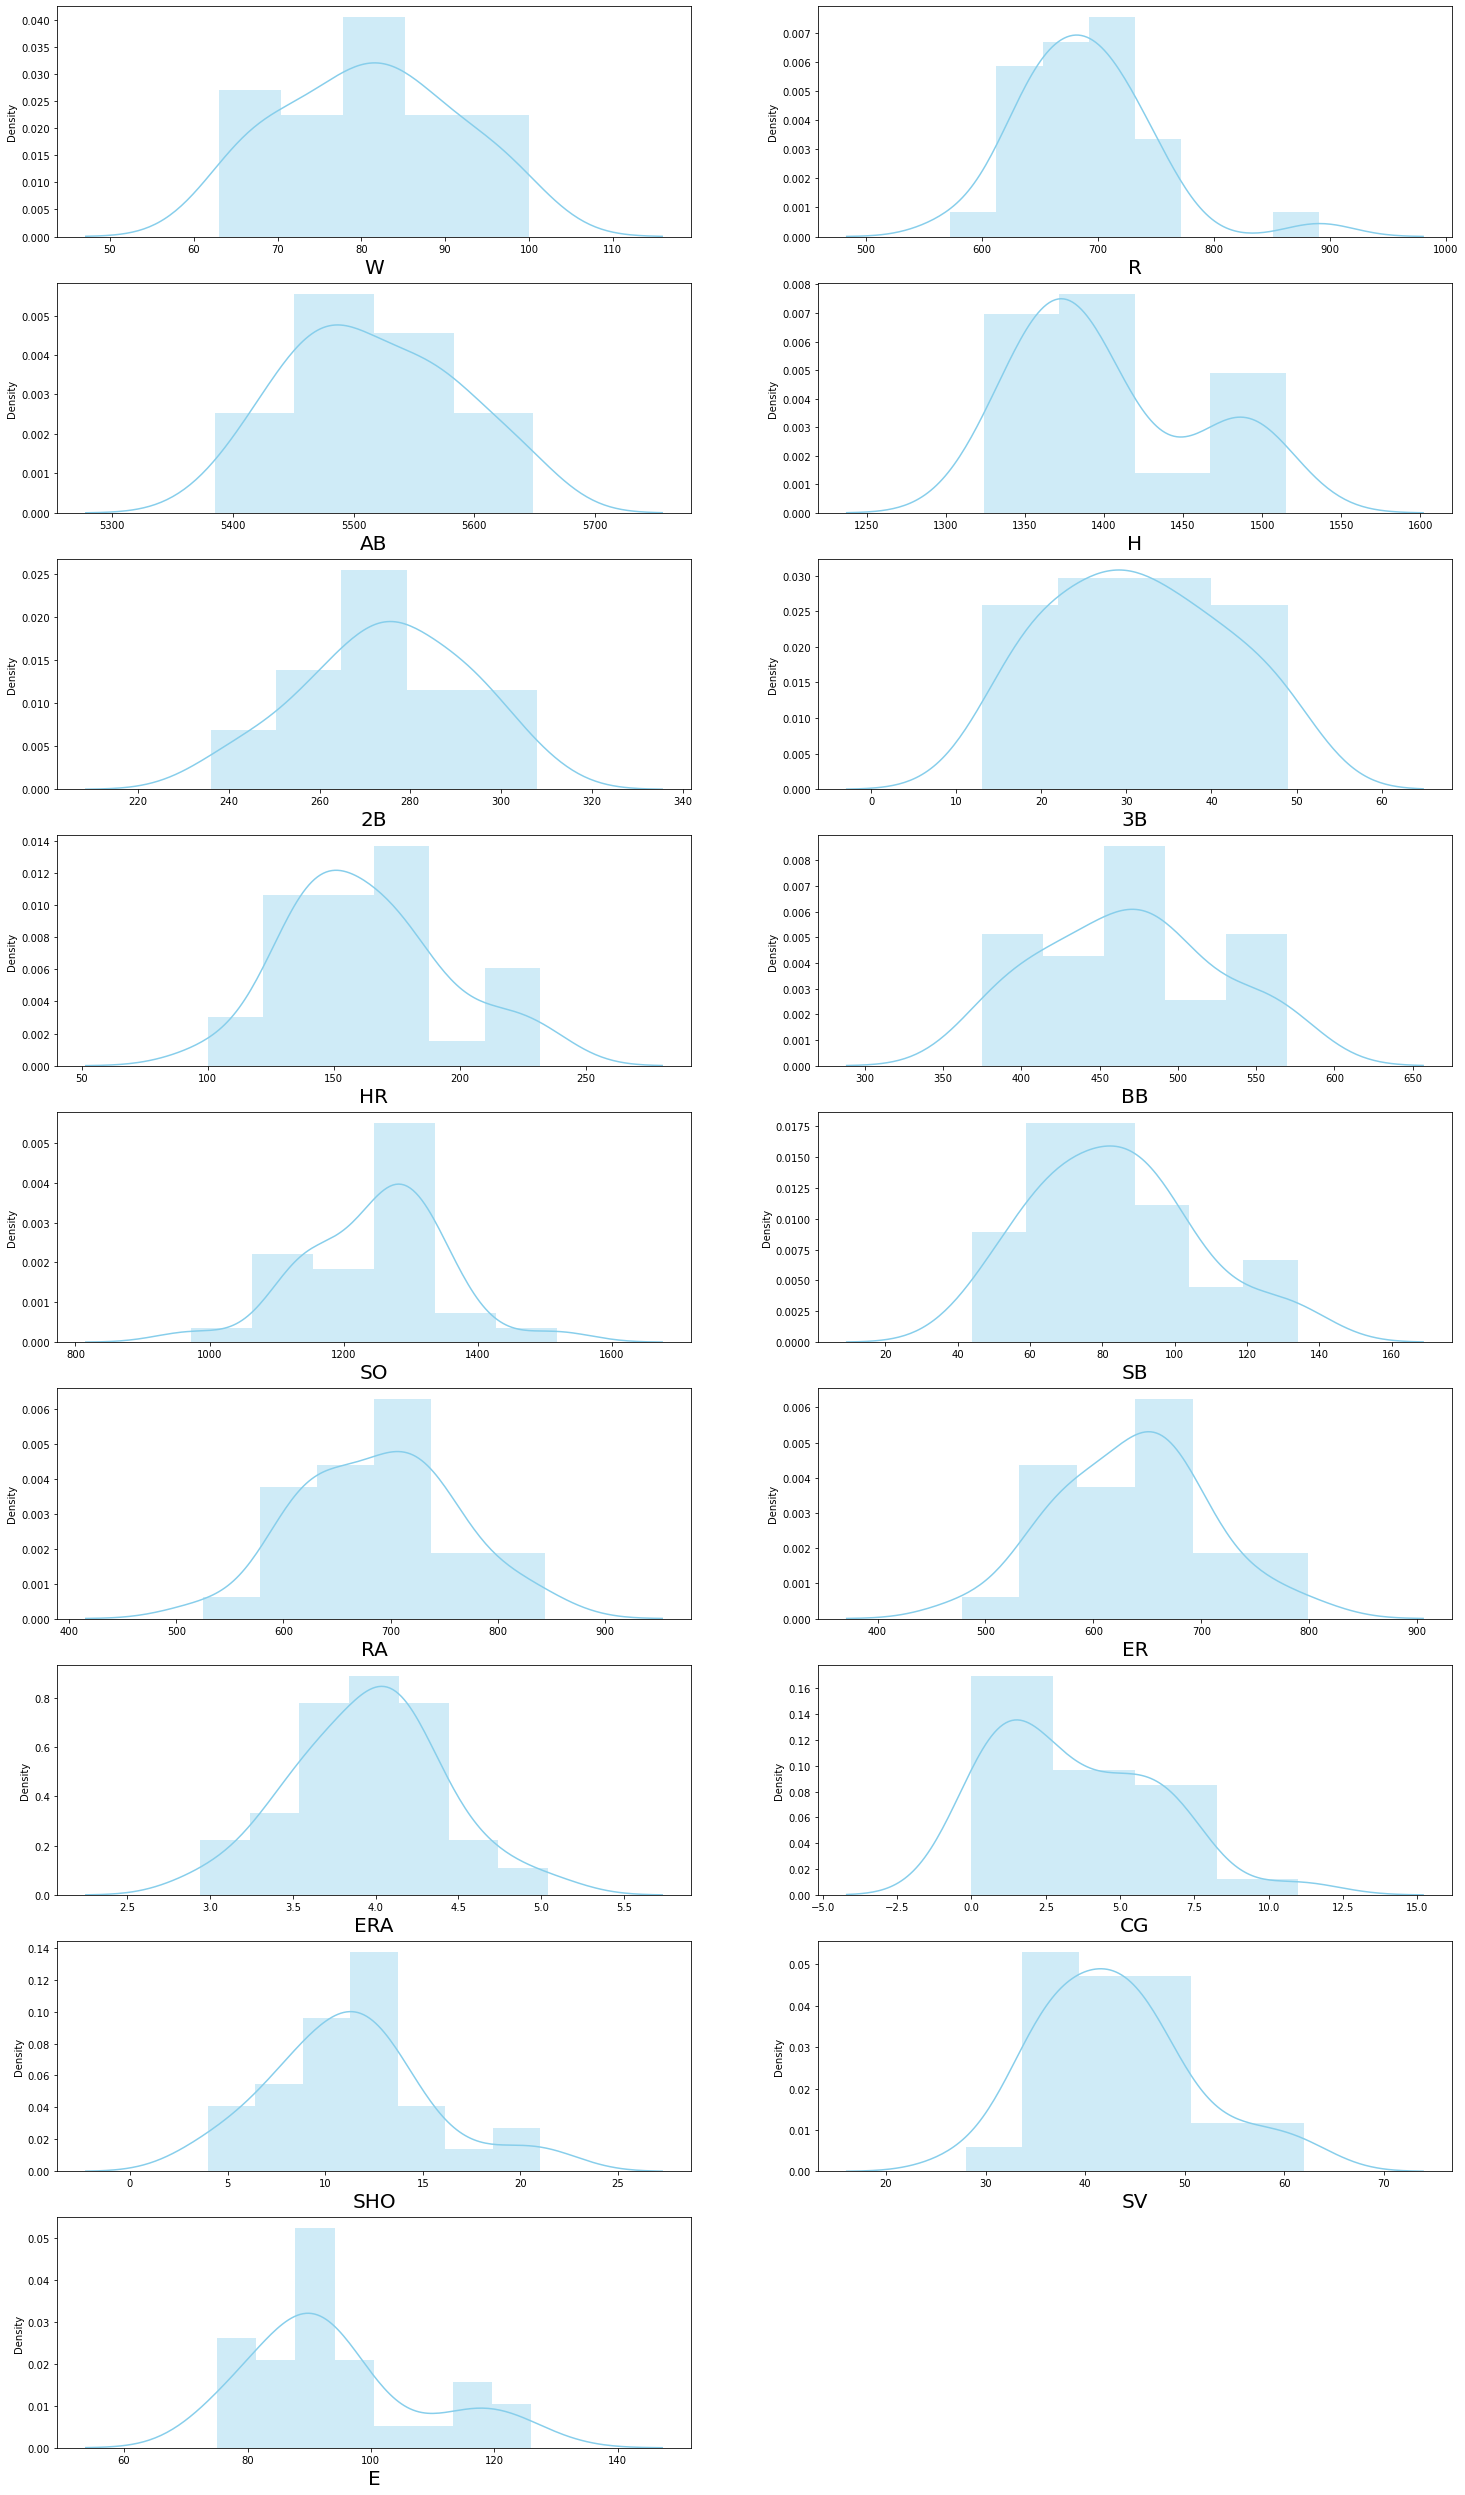

In [12]:
# Using Distplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

According to the above images we obsereved that all the columns are normally distributed, except R,SO,CG and E.

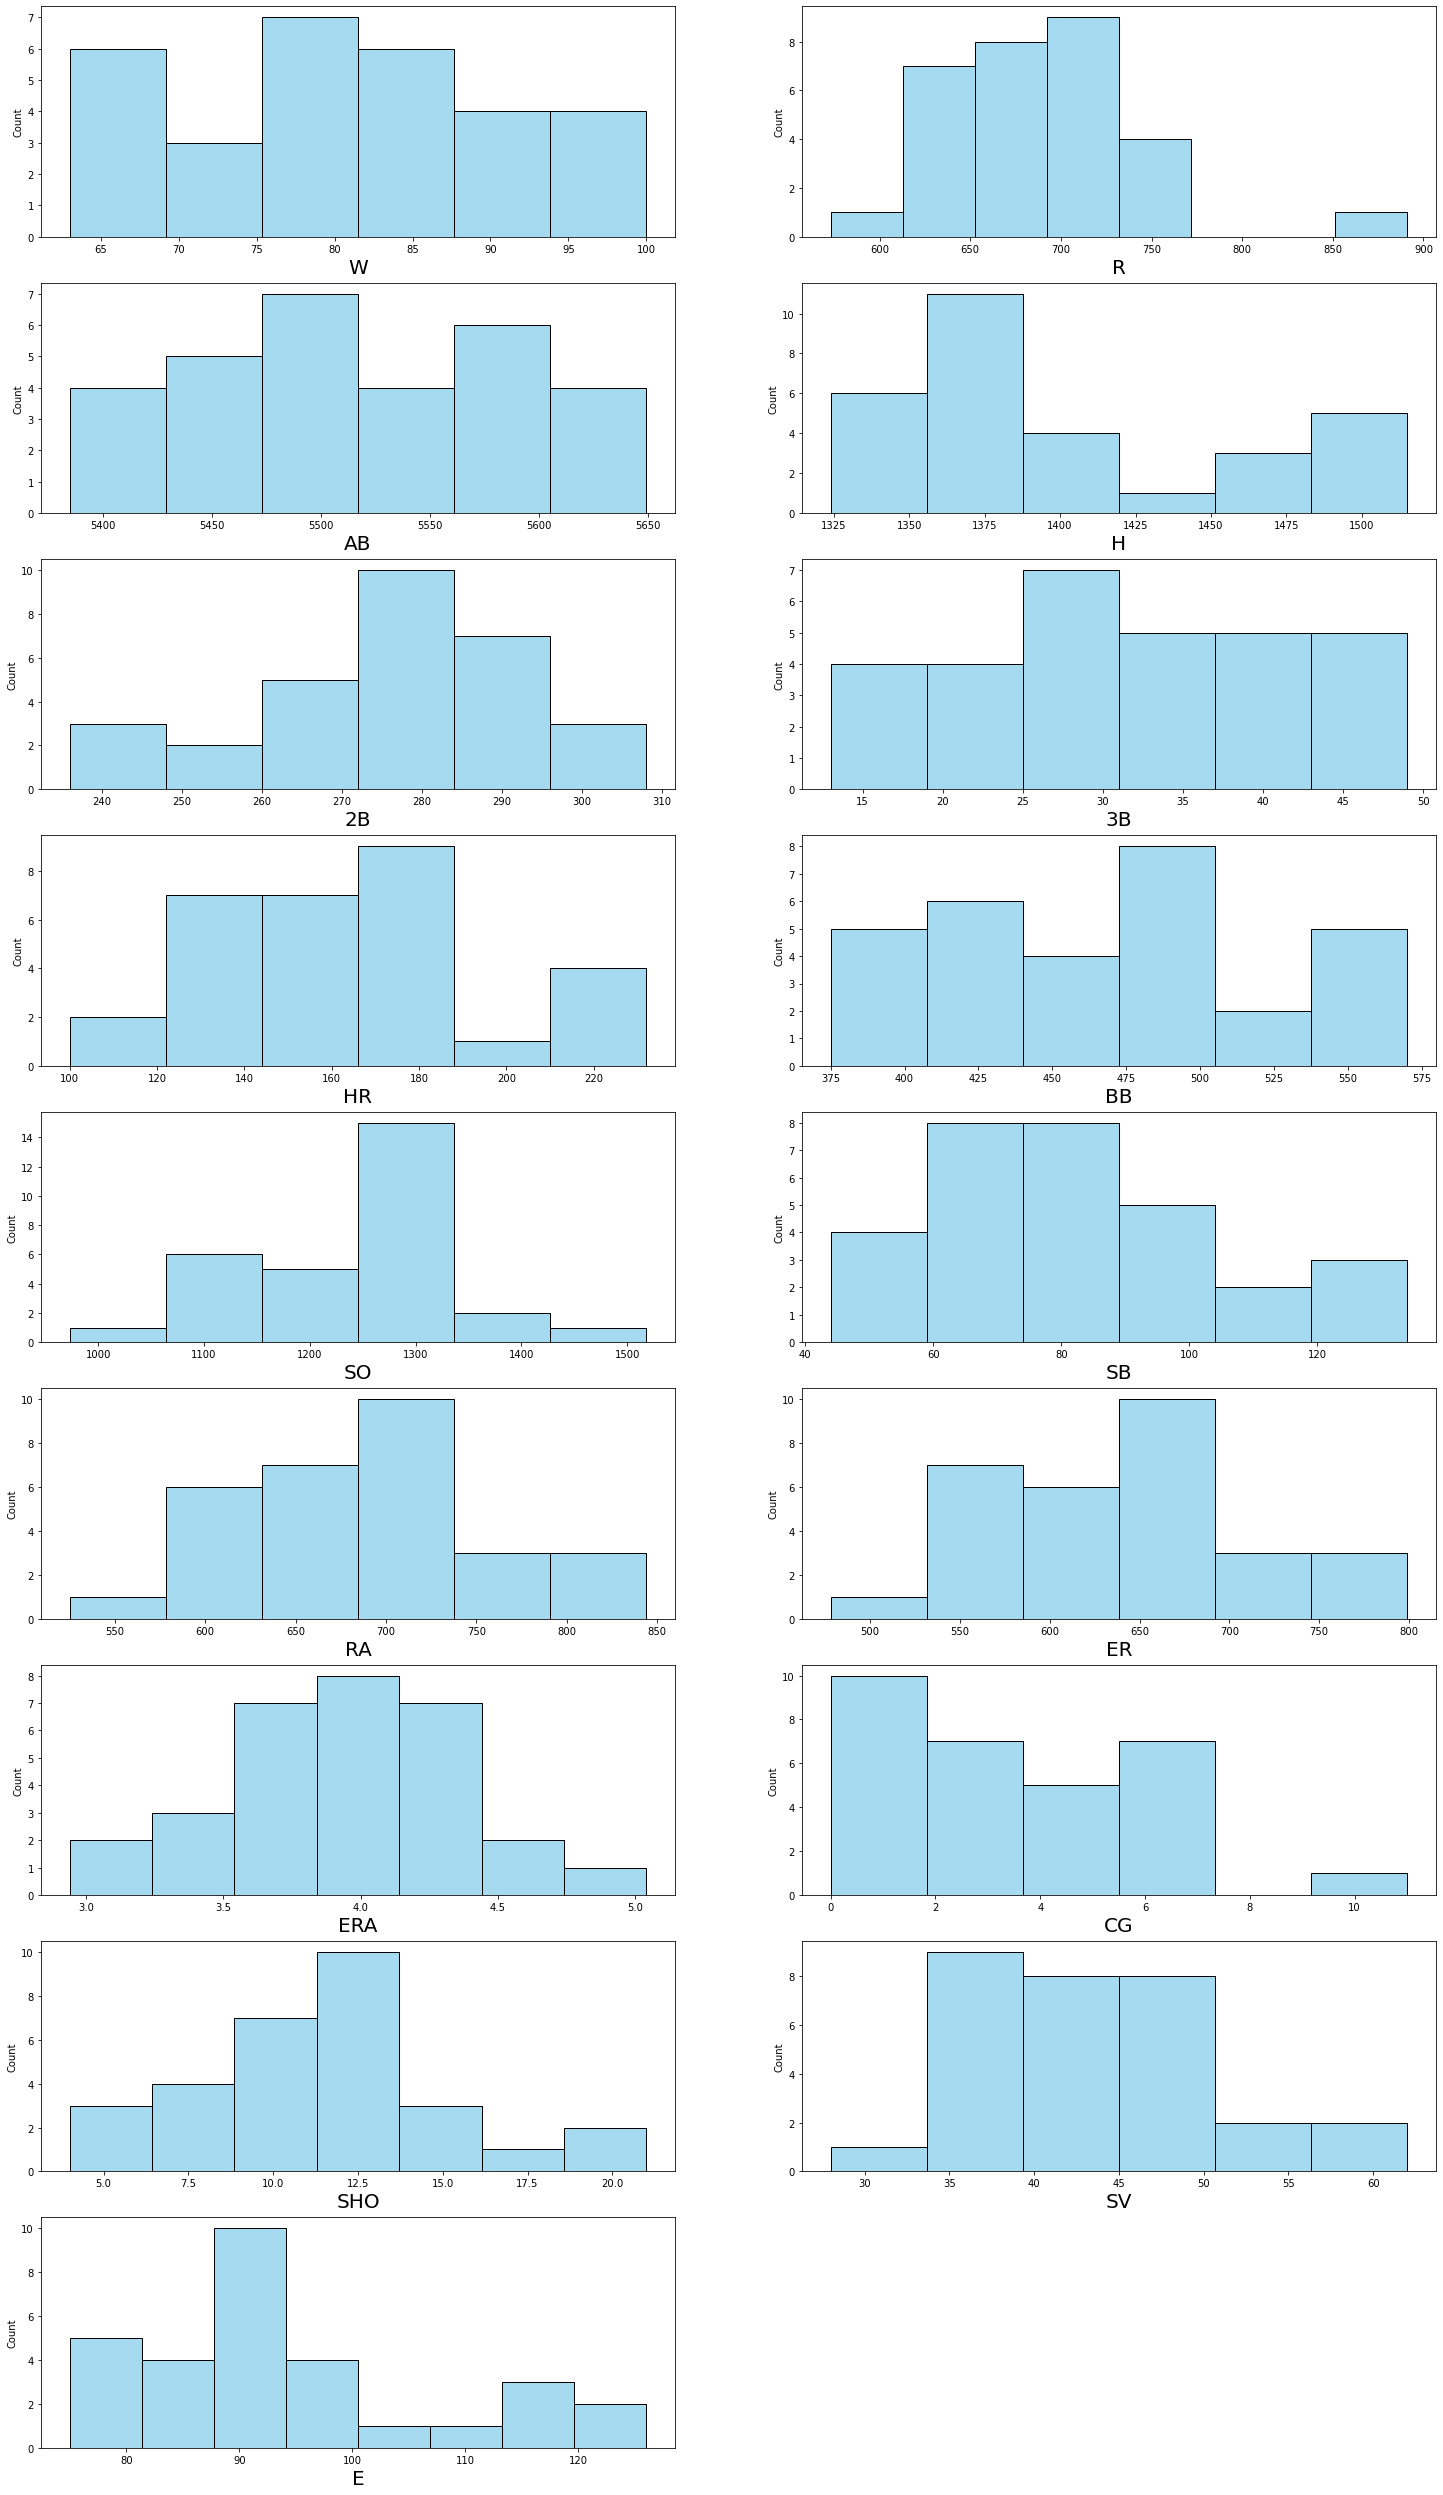

In [13]:
# using Histplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

According to the above images we obsereved that ERA is equally distributed.

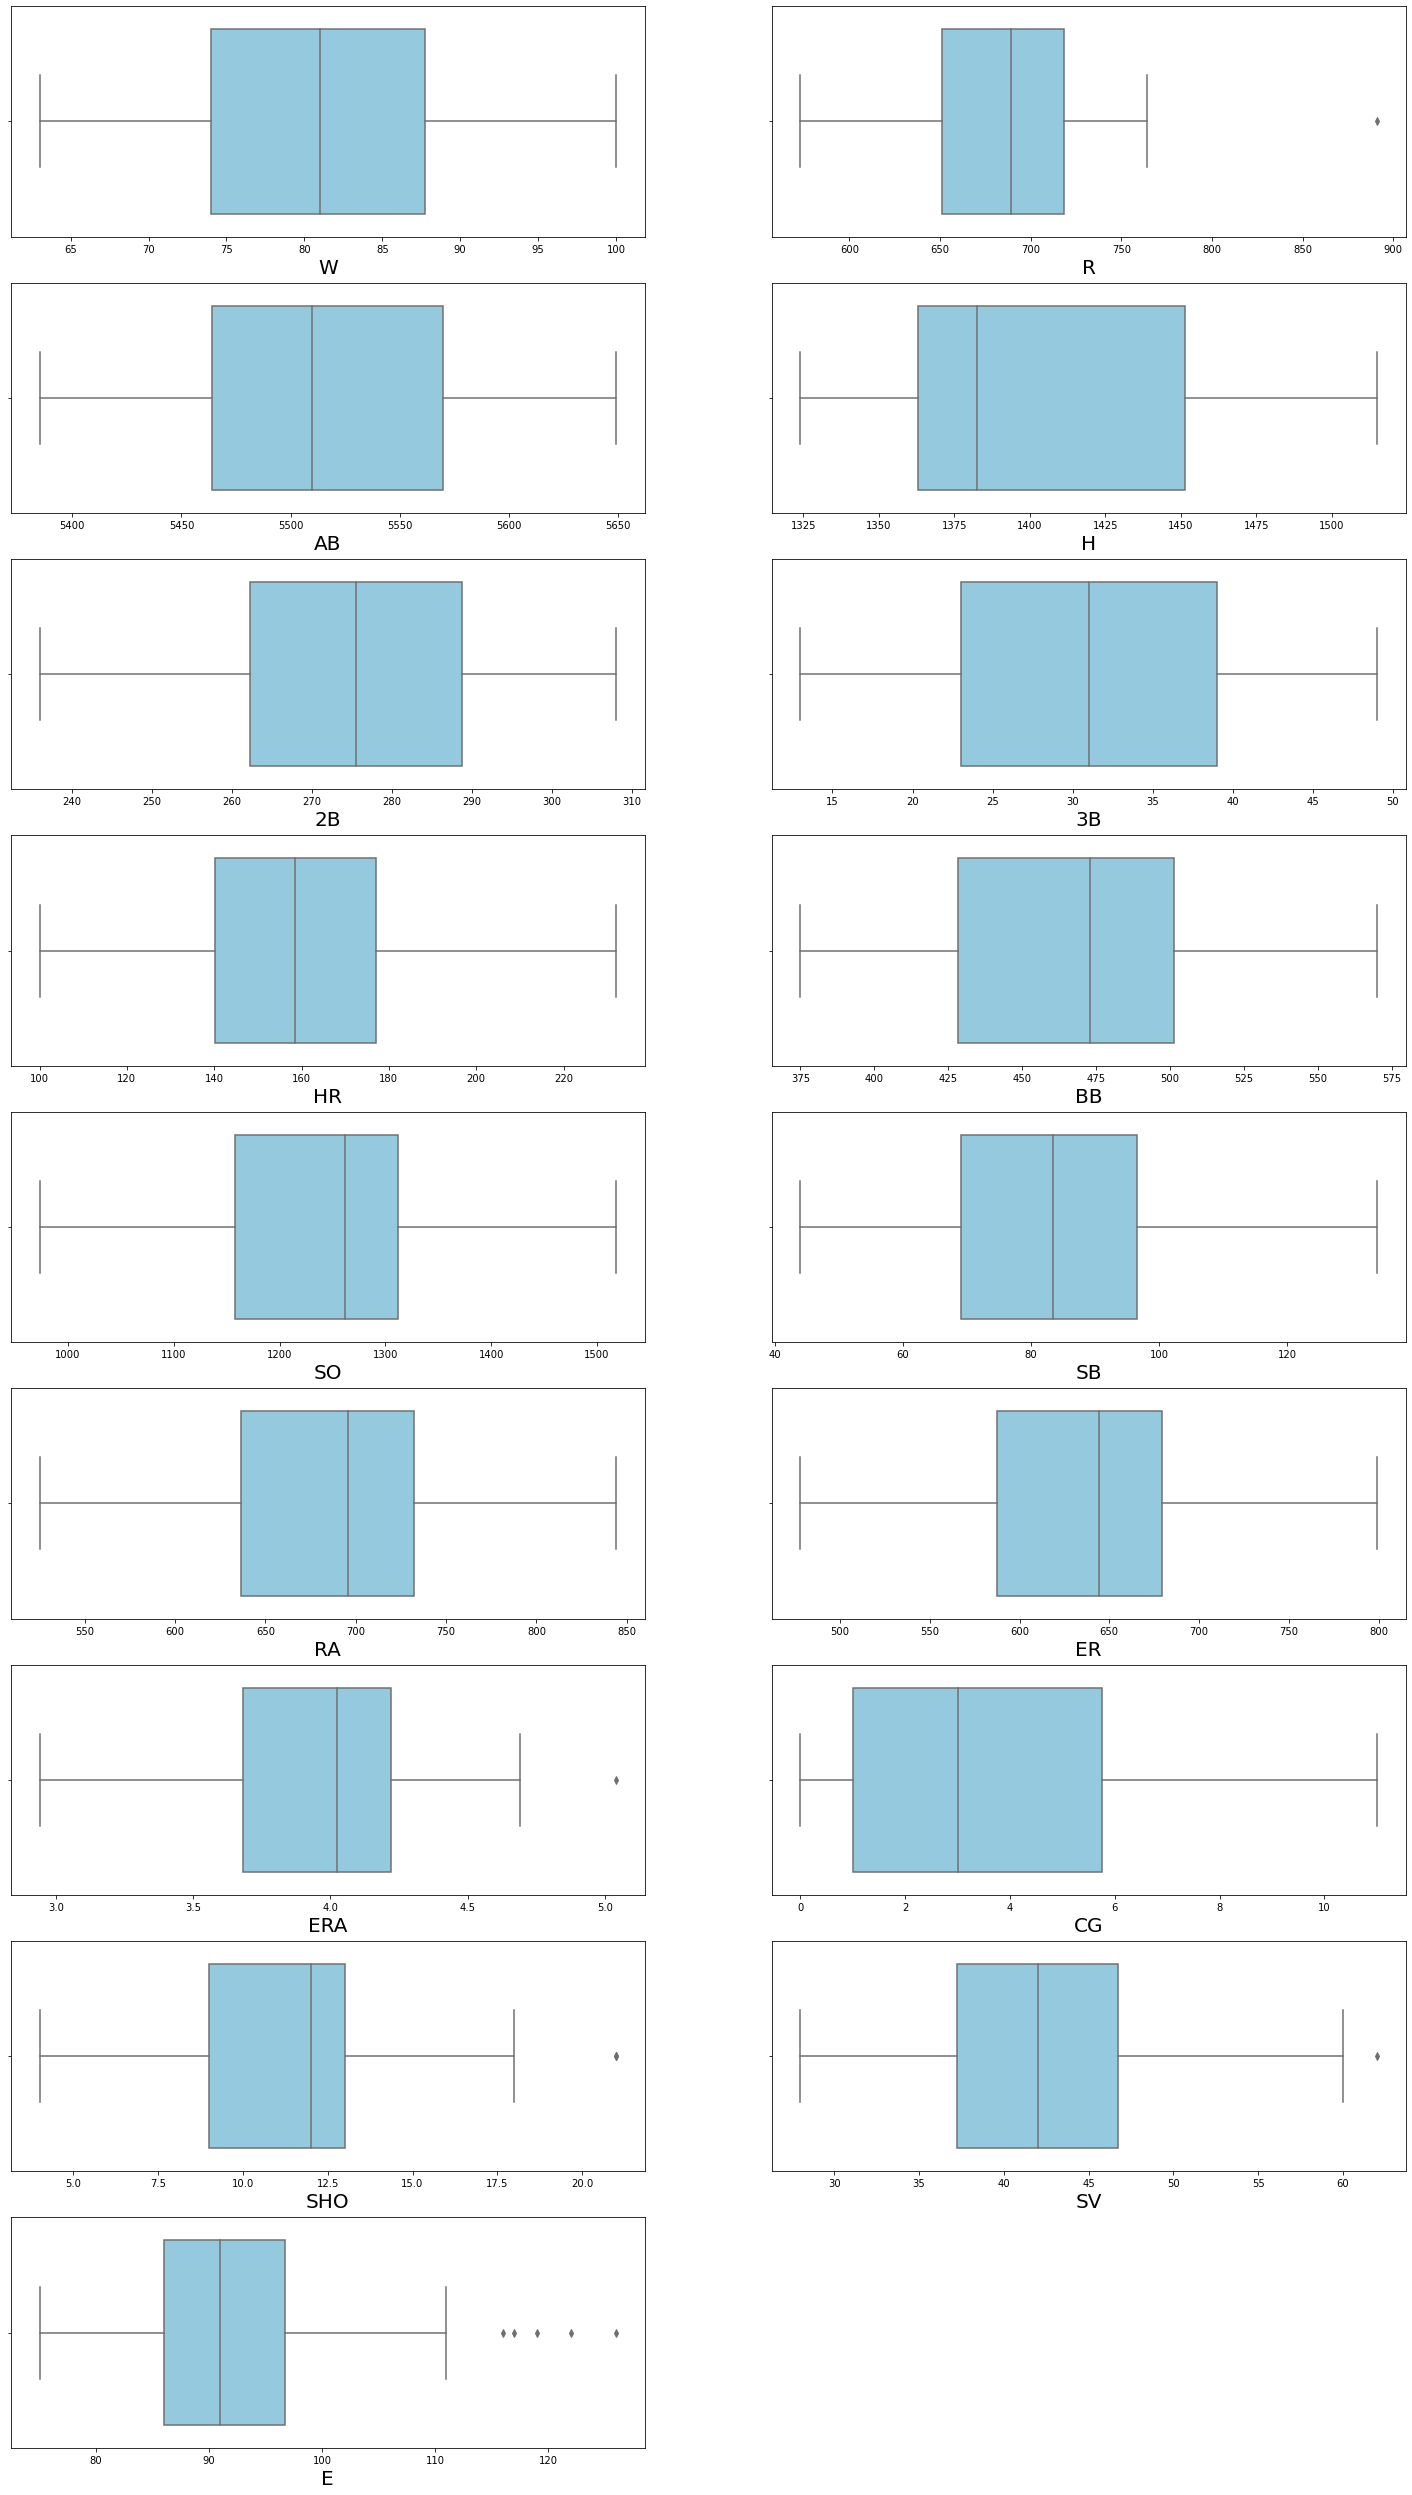

In [14]:
# Using Boxplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

According to the above images we obsereved that in boxplot R, ERA, SHO, SV and E input variable is having outliers in it. So, we need remove outliers from that the input variables.

# Removing outliers

In [15]:
#Removing outliers using IQr from E column
Q1 = df['E'].quantile(0.25)
Q3 = df['E'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
df = df[(df['E']>lower_lim)&(df['E']<upper_lim)]
df.shape

(25, 17)

In [16]:
#Checking shape of new dataset
df.shape

(25, 17)

As we previous check dataset shape is (30,17), after removing the outliers new dataset is (25,17) 25 rows and 17 columns

In [17]:
#Checking dataloss
Dataloss = (((30-25)/30)*100)
Dataloss

16.666666666666664

In [18]:
# Using Zscore to removing outliers
#Features having outliers
features=df[['R','ERA','SHO','SV','E']]

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


In [20]:
#Checking shape of new dataset
df_new.shape

(24, 17)

In [21]:
Dataloss = (((30-24)/30)*100)
Dataloss

20.0

As we observe that using zscore data loss is 20% on the other side if we used IQr from E column the dataloss is 16%
so, we prefer IQr Method.

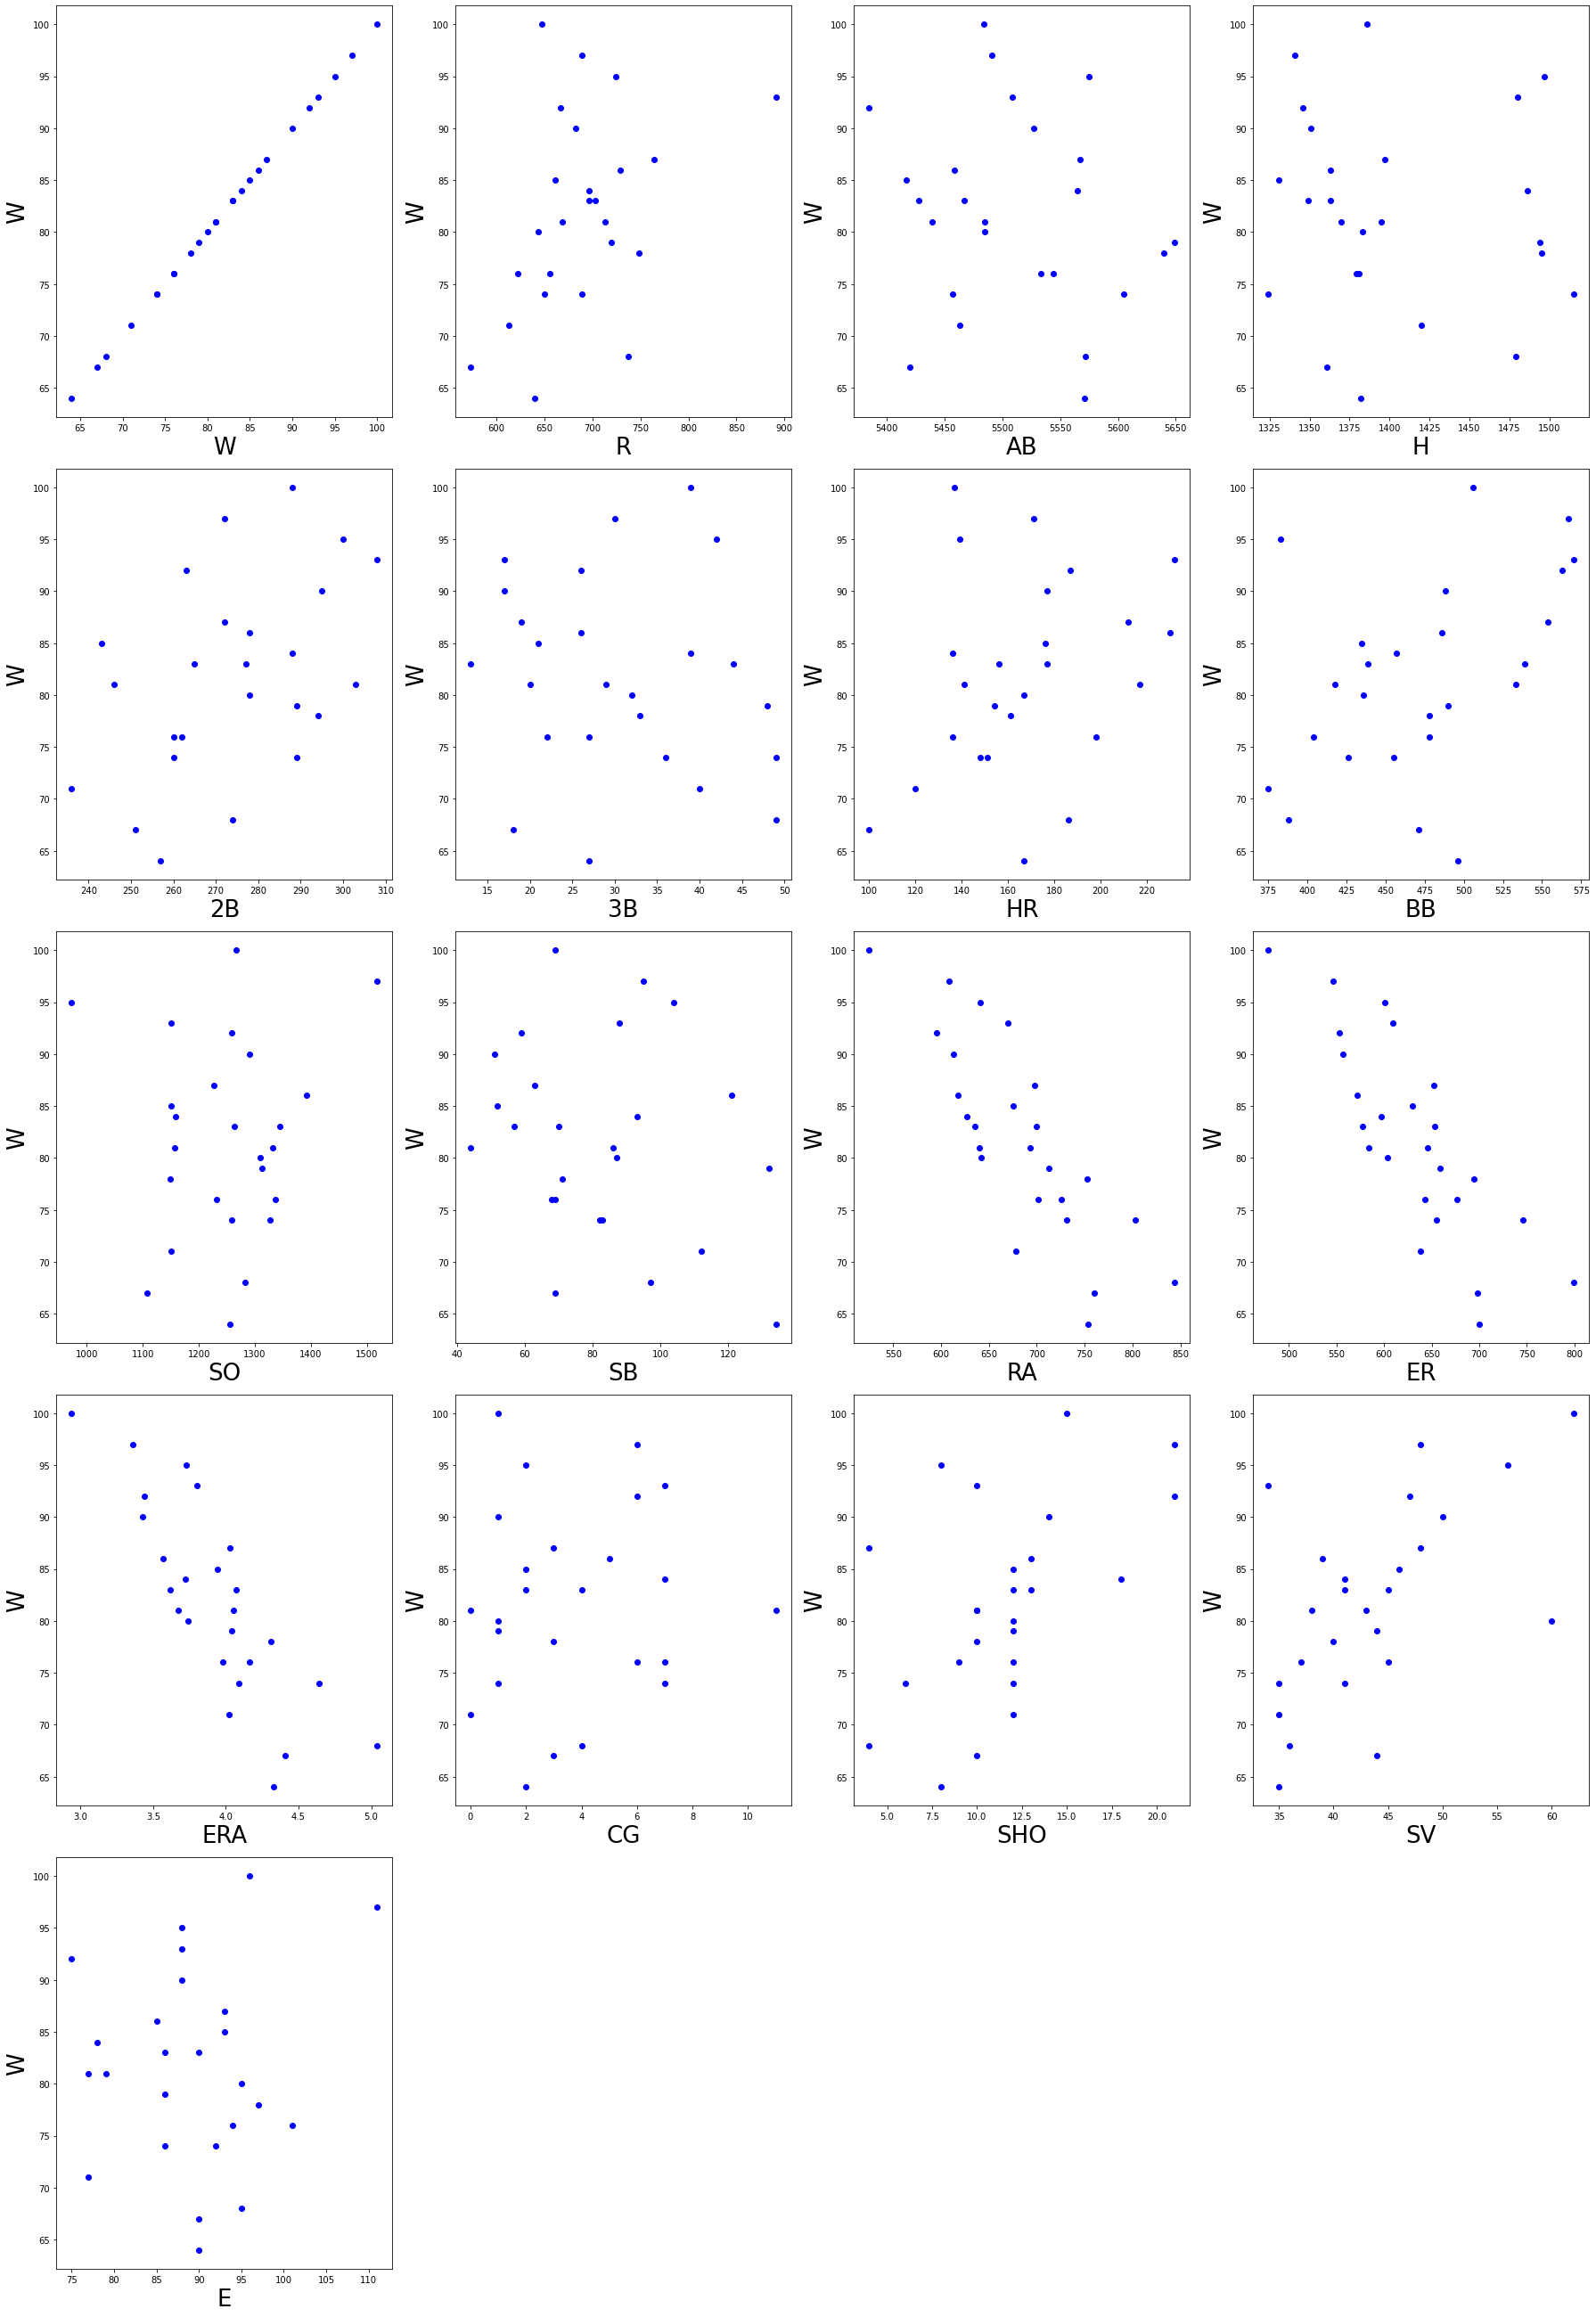

In [22]:
#Using Scatterplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()

According to the above images we obsereved that in scatterplot SV, ERA, SHO and R is having almost linear relationship with target variable and other variables are having non linear relation ship with target variable.

# Multivariate Analysis

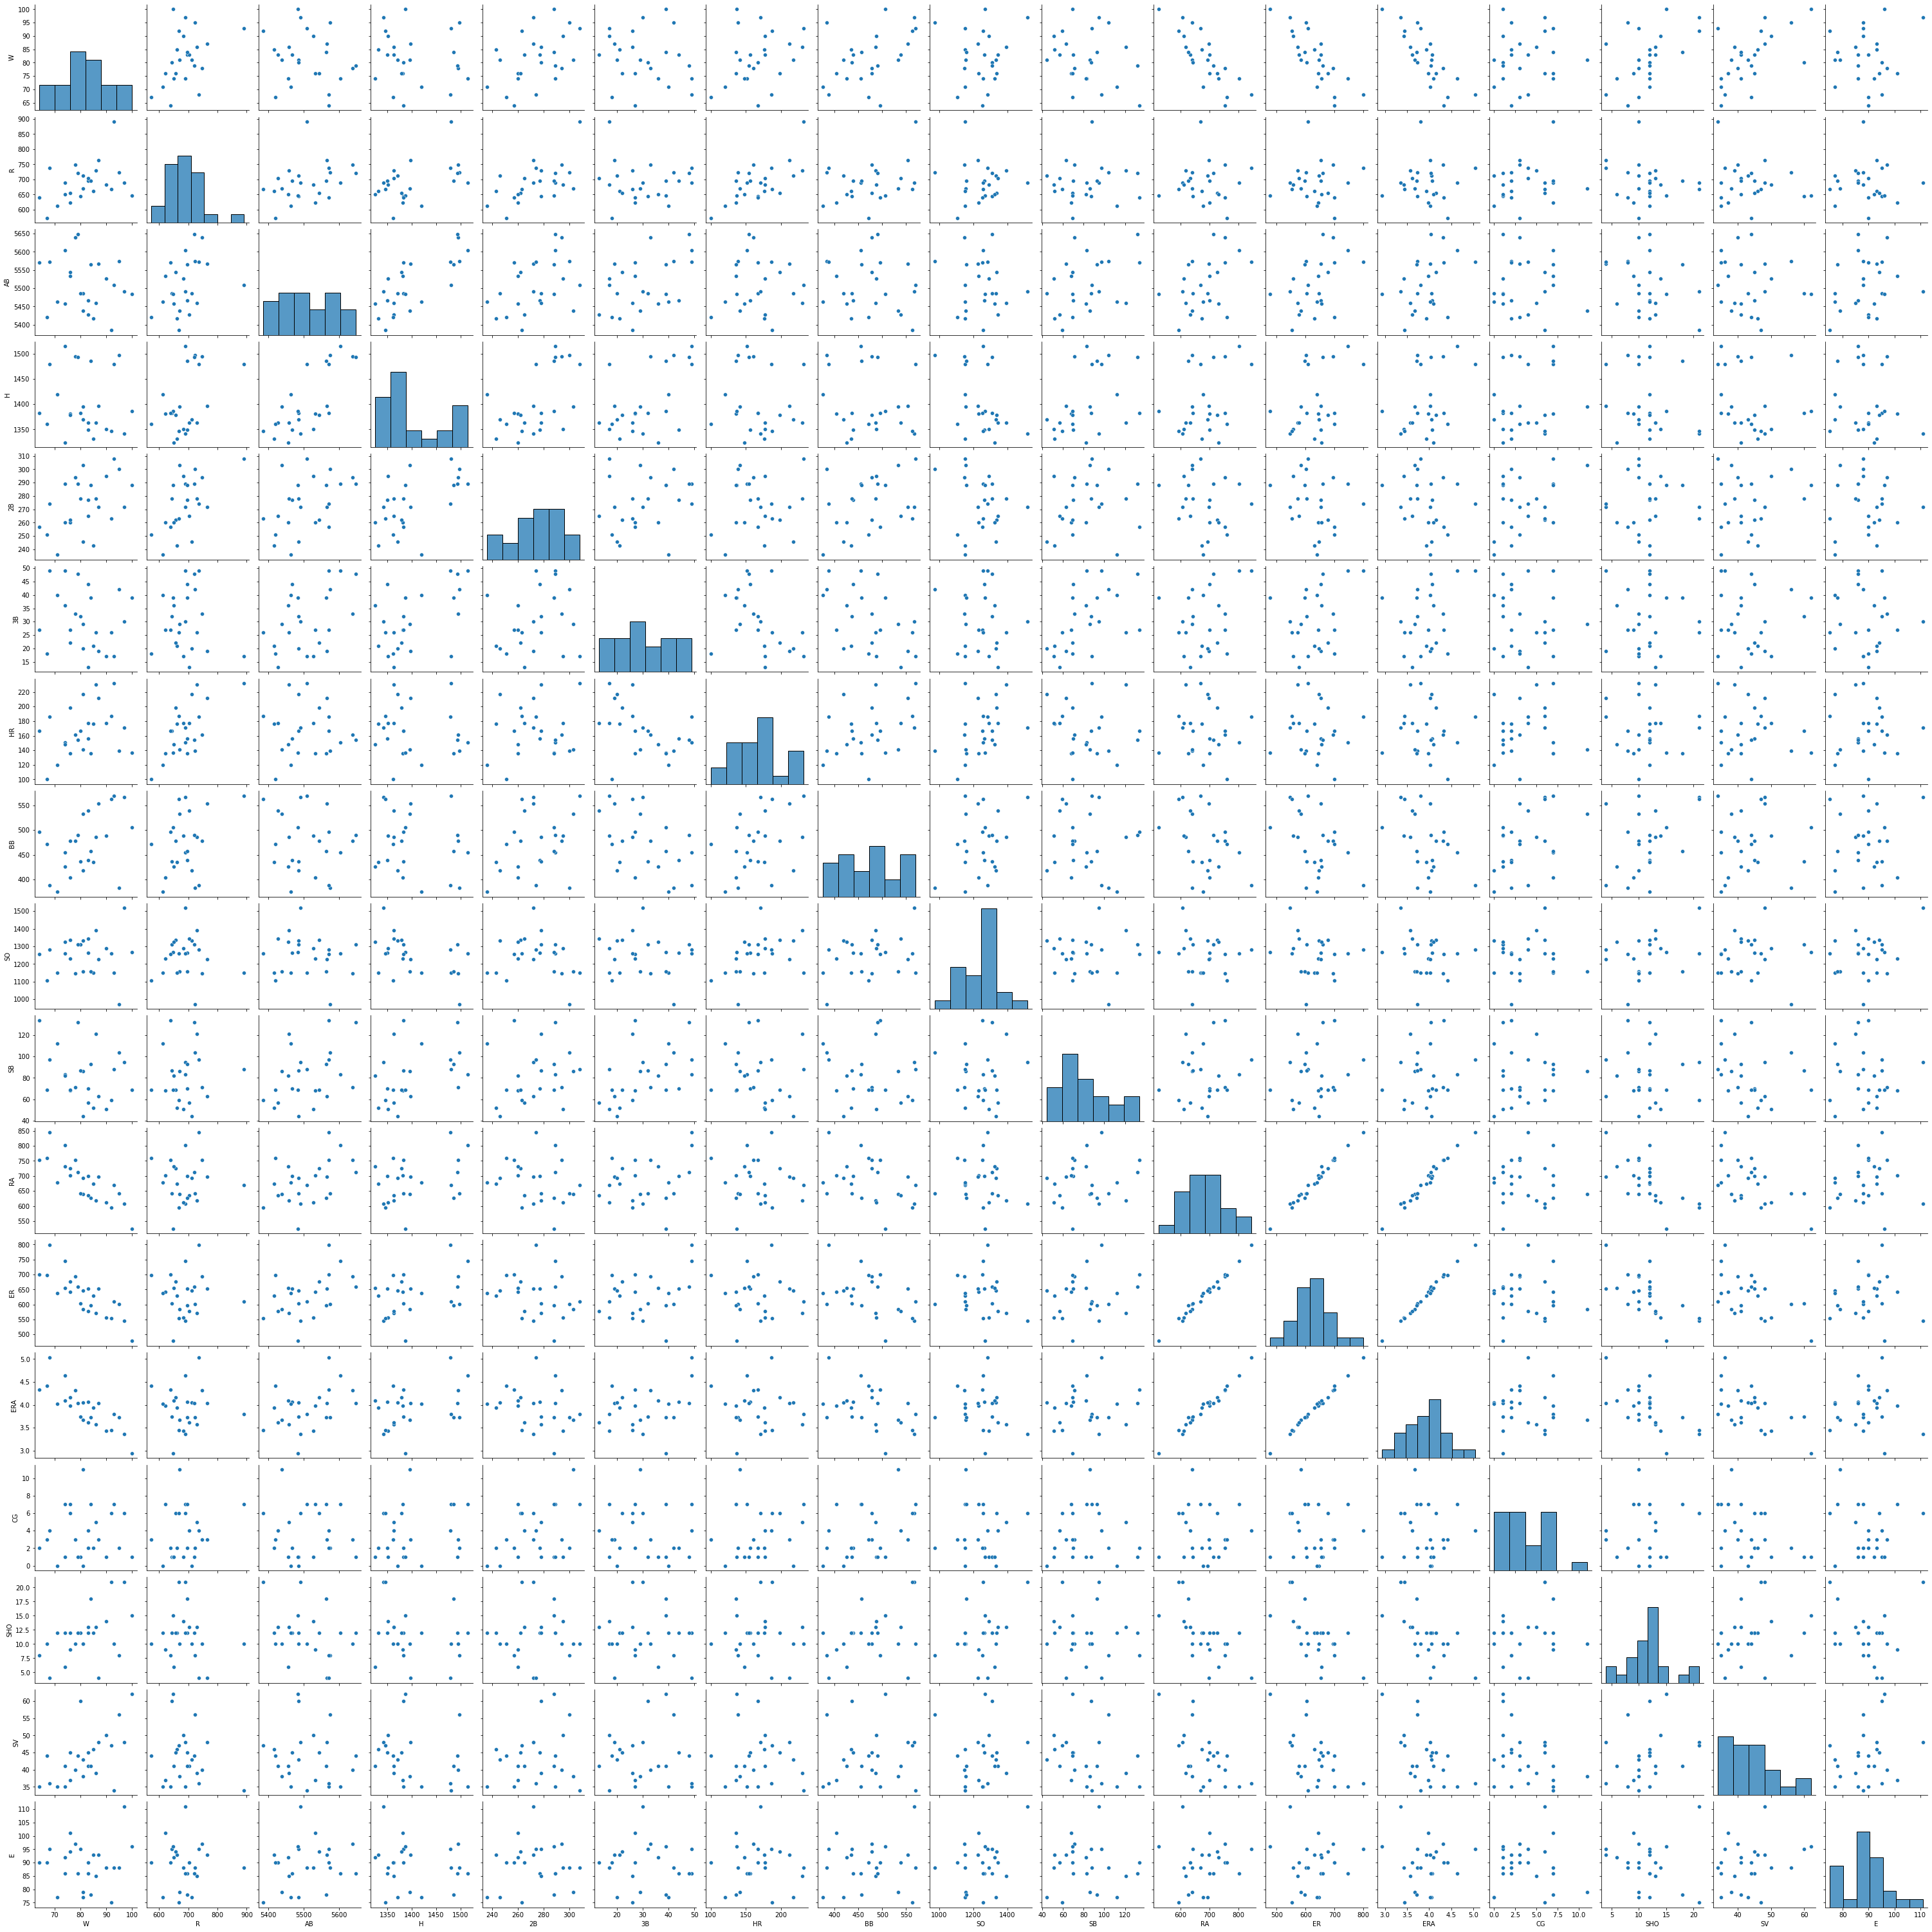

In [23]:
# Using pairplot
sns.pairplot(df)
plt.show()

According to the above image we observed that, pair plot are making good correlation if they are just scattered without any pattern.

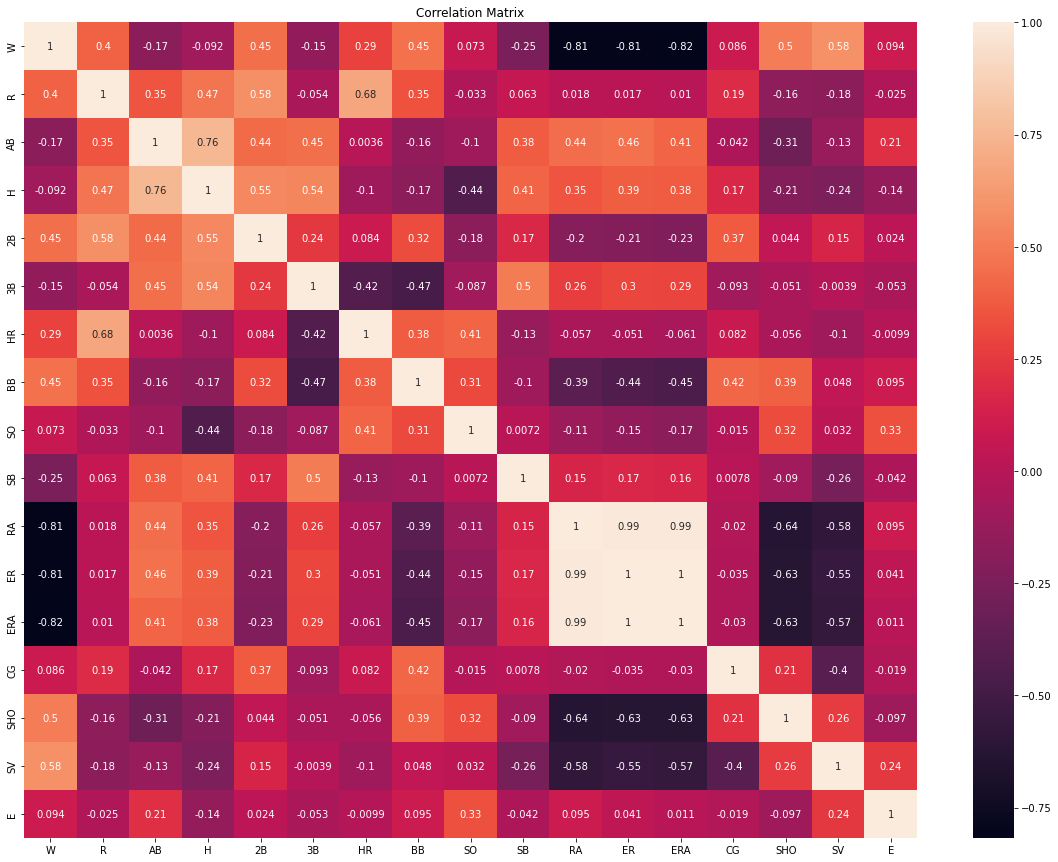

In [24]:
# Using Heatmap
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

According to the above image we observed that, RA, ER, ERA columns are highly correlated with each other on the otherside these columns are highly negatively correlated with Wins(W) columns that means there is high impact of these columns on wining.
We are dropping two columns(er,ra) and keeping ERA from them because these have same kind of effect on wins, will not affect the prediction model.

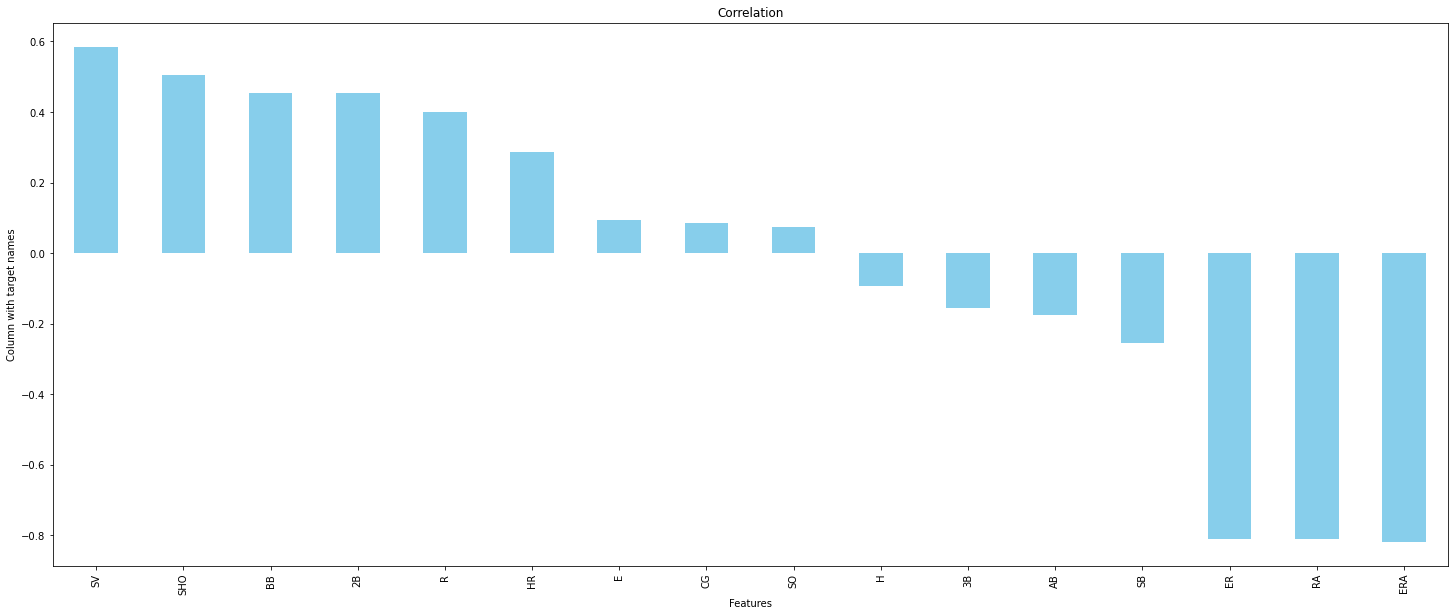

In [25]:
# Using correlation matrix
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

According to the above image we observed that, the correlation matrix and the graph,ER,RA,ERA have the strongest correlation with wins but in negative nature shows (0.99) hightest correlation..
In positive side SV has the highest correlation of 0.67 followed by BB, SHO, R, 2B all above 0.4.

In [26]:
#Checking for Skewness
df_new.skew()

W      0.150095
R     -0.283799
AB     0.267092
H      0.824277
2B    -0.188987
3B     0.201691
HR     0.231168
BB     0.108890
SO    -0.192100
SB     0.635142
RA     0.175516
ER     0.200941
ERA    0.240317
CG     0.868504
SHO    0.483189
SV     0.985828
E      0.321413
dtype: float64

In [27]:
df.skew()

W      0.063129
R      1.244474
AB     0.272765
H      0.684656
2B    -0.120879
3B     0.256823
HR     0.293139
BB     0.096083
SO    -0.100732
SB     0.612946
RA     0.200557
ER     0.244487
ERA    0.280810
CG     0.728951
SHO    0.534007
SV     0.966822
E      0.346299
dtype: float64

In [28]:
# Splitting the columns
x = df.drop("W",axis=1)
y = df["W"]

# Scaling Data using StandardScaler

In [29]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [30]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [31]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.580480,0.941114,1.575831,1.363235,1.069913,-0.858638,-1.571891,-2.568052,0.903891,-0.586300,-0.440977,-0.453037,-0.607104,-0.846545,1.678744,-0.148522
1,0.116626,-0.610173,-0.897896,0.160996,1.256309,-0.338066,-0.598153,0.149809,-0.508439,0.263202,0.330584,0.336064,-0.607104,0.115438,0.189536,-0.396059
2,-0.330661,-1.012358,-0.129035,1.520049,-0.141661,-0.797394,1.036335,-0.849542,0.156187,-0.600699,-0.693218,-0.592290,2.645238,-0.365554,-0.758143,-1.262438
3,-1.109273,0.337836,-0.363036,-0.727616,-0.328057,-0.950504,-1.206739,-0.158402,-0.591517,0.277600,0.182207,0.127185,1.199753,-0.606049,-0.893525,1.460468
4,0.000663,1.372027,1.876689,0.788251,1.722299,-0.491175,-0.319942,0.103111,0.031570,1.746231,1.710491,1.658969,1.199753,0.115438,-1.164290,-0.396059


# Variance inflation factor

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,15.832692,R
1,24.002332,AB
2,15.215671,H
3,8.010882,2B
4,6.020065,3B
5,15.276858,HR
6,4.105805,BB
7,6.481898,SO
8,2.548207,SB
9,264.599473,RA


As per the above data in VIF values multicolinearity exists in RA,ER,ERA. So, drop RA and ER columns to avoid multicolinearity.

In [33]:
#Droping ER and RA
X = X.drop(["ER","RA"],axis=1)

In [34]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,15.114824,R
1,5.372733,AB
2,10.940528,H
3,5.667120,2B
4,5.137807,3B
5,11.255552,HR
6,3.498234,BB
7,4.697909,SO
8,2.251083,SB
9,5.324296,ERA


Multicolinearity issue is solved.

# Splitting the data for training and testing

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9909349475142847
At random state0, The test accuracy is :--0.07560737009895502


At random state1, The training accuracy is :-0.9842618698041318
At random state1, The test accuracy is :--1.2142763174927165


At random state2, The training accuracy is :-0.9992445016989551
At random state2, The test accuracy is :-0.5813722265189549


At random state3, The training accuracy is :-0.9891800913317649
At random state3, The test accuracy is :-0.6815684894070432


At random state4, The training accuracy is :-0.9819554509320878
At random state4, The test accuracy is :-0.7035965540331319


At random state5, The training accuracy is :-0.9812926840364846
At random state5, The test accuracy is :-0.5458839646376437


At random state6, The training accuracy is :-0.9936892747587154
At random state6, The test accuracy is :--1.3721900568194418


At random state7, The training accuracy is :-0.9924005152876136
At random state7, The test accuracy is :--1.746163

As per the above report we see that random state=99 giving highest accuracy,choosing that as random state.

# Model Building

In [37]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

Linear Regression:

In [38]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9968710343077838


In [39]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 54.18719478695872
MAE: 6.379967084636756
r2_score: -0.2693490243928993


SGDRegressor:

In [40]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -1.4988787629045215e+28
mae: 7.631791034455521e+29
mae: 787340540388116.1
rmse: 873601226788030.6


Lasso Regressor:

In [41]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 10, 'random_state': 0}


In [42]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7367294995262785
mse: 13.404856315786985
mae: 3.021822694123261
rmse: 3.6612643056445657


Ridge Regressor:

In [43]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [44]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.49970822376910917
mse: 25.47318960642286
mae: 3.865011201697586
rmse: 5.047097146521241


Cross Validation:

In [45]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 31.011917, 27.032244
R   : 26.601305, 14.995634
svr   : 96.962545, 92.273884
svr_p   : 93.575504, 72.698216
svr_r   : 93.923417, 73.003366
RF   : 54.866348, 29.464528
DTR   : 69.900000, 41.943825
GBR   : 65.989567, 31.481008


As per the above observation of model building , we conclude that linear regression is the final model for this dataset.

# Hyper Parameter Tuning

In [46]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [47]:
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [48]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [49]:
GVC.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 8,
 'selection': 'random',
 'tol': 100}

In [50]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 94.54017370182237
mean_squared_error: 2.7799615568221103
mean_absolute_error: 1.2919332605929246
RMSE value: 1.6673216716705


The result of hyper parameter tuning 94% accurate , its good.

# Saving the model

In [51]:
#Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

# Predictions

In [52]:
#Loading the saved model
model=joblib.load("BaseballCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([89.373313  , 81.69198052, 69.23102451, 82.89438304, 74.3664227 ,
       78.67493716])

Above all are the predicted value

In [53]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5
Predicted,89.373313,81.691981,69.231025,82.894383,74.366423,78.674937
Original,90.000000,85.000000,68.000000,81.000000,74.000000,79.000000


As per the above orignal and predicted data both are similar  almost.